# Plotting drastically different time series

Plotting multiple time series on a single graph is always a challenge. The challenge becomes especially difficult when the time series are very different one from another.
In this exercise, we will plot the per-capita Gross Domestic Product (GDPPC) of OECD countries. OECD (Organisation for Economic Co-operation and Development) is an intergovernmental economic organization with 35 member countries with very different economy types and sizes.

In [1]:
import pandas as pd
import os
from matplotlib import pylab as plt
import seaborn as sns
import numpy as np
import ipywidgets
import matplotlib as mpl
from statsmodels.nonparametric.kde import KDEUnivariate
%matplotlib inline

In [2]:
dir_data = './data/'

In [3]:
df_gdppp = pd.read_excel('./data/GDP_per_capita.xlsx', sheet_name='Data')
df_gdppp.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24015.420612,25921.538234,27549.889422,24640.421244,24289.141516,25353.787545,NaN,NaN,NaN,NaN
1,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42417.229146,47253.529796,46735.999575,42701.447136,39639.386021,41630.052579,39666.369215,42806.522448,NaN,NaN
2,Afghanistan,AFG,59.787681,59.890037,58.505995,78.802587,82.231395,101.321627,137.946783,161.384702,...,280.245644,380.400955,384.131681,458.955782,569.940729,622.379654,690.842629,653.347488,633.947864,590.269515
3,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2253.838850,3151.022431,4242.363062,3678.947654,3886.479354,4744.987629,5086.848426,5327.148892,5232.690501,4102.118590
4,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3005.012903,3603.013685,4370.539647,4114.136545,4094.358832,4437.811999,4247.839852,4412.345578,4588.649440,3965.016806


In [4]:
df_groups = pd.read_csv('./data/country_groups.csv')
oecd_countries = df_groups.loc[df_groups.GroupCode == 'OED'].CountryCode.values

In [5]:
df_oecd_wide = df_gdppp.loc[df_gdppp['Country Code'].isin(oecd_countries)]
df_oecd_wide.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
11,Australia,AUS,1806.804876,1873.450092,1851.007782,1963.229966,2127.165739,2276.574953,2338.900693,2574.670890,...,36084.858978,40957.830439,49628.115127,42715.132262,51845.654861,62216.547129,67646.103853,67652.683215,61995.829698,56327.721448
12,Austria,AUT,935.460427,1031.815004,1087.834243,1167.000532,1269.412583,1374.532140,1486.968606,1569.667183,...,40430.993614,46586.650253,51386.376651,47654.187209,46659.840818,51123.561329,48324.254037,50557.803806,51148.358876,43438.863038
15,Belgium,BEL,1273.691659,1350.197673,1438.523233,1535.023729,1701.846276,1835.594766,1957.626080,2086.636005,...,38852.361034,44403.831306,48424.589273,44880.560152,44382.879768,47699.807052,44734.452347,46622.467987,47299.860109,40231.283174
33,Canada,CAN,2294.568814,2231.293824,2255.230044,2354.839122,2529.518179,2739.585849,3010.705908,3173.076194,...,40386.699484,44544.526800,46596.335991,40773.454364,47445.761935,52083.826223,52495.288472,52266.175676,50185.481497,43248.529909
35,Switzerland,CHE,1787.360348,1971.316323,2131.391652,2294.182847,2501.293190,2620.475547,2784.733548,2960.722586,...,57348.927882,63223.467775,72119.560873,69672.004715,74277.120513,88002.609570,83208.686542,84669.292937,85610.842029,80214.730152


In [6]:
df_oecd = df_oecd_wide.melt(id_vars=['Country Name', 'Country Code'], var_name='year', value_name='GDPPC')
df_oecd.year = df_oecd.year.astype(int)
df_oecd = df_oecd.loc[df_oecd.year >= 1990]
df_oecd.sample(10)

,Country Name,Country Code,year,GDPPC
1025,Chile,CHL,1990,2401.525181
1133,Finland,FIN,1993,17617.030439
1582,Israel,ISR,2006,21905.017695
1415,"Korea, Rep.",KOR,2001,11255.947889
1020,Australia,AUS,1990,18221.691211
1387,Poland,POL,2000,4492.727604
1513,Iceland,ISL,2004,46921.125600
1249,Norway,NOR,1996,37321.443390
1690,Netherlands,NLD,2009,51900.340095
1183,Poland,POL,1994,2819.689466


Text(0.5,1,'Not really!')

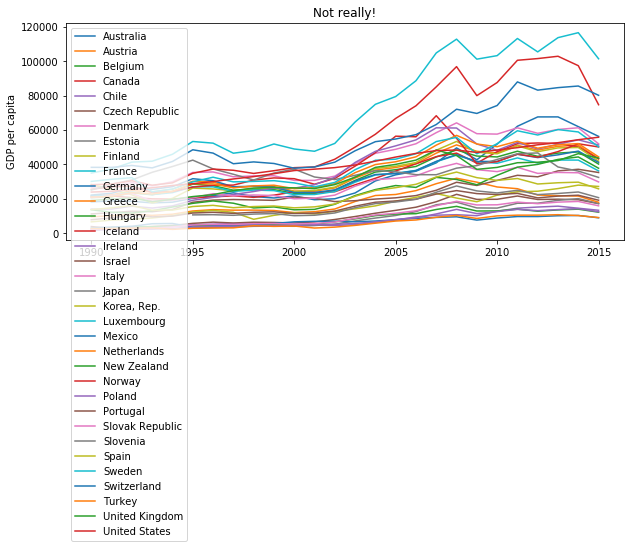

In [7]:
fig, ax = plt.subplots(figsize=(10, 4))
for (name, code), df in df_oecd.groupby(['Country Name', 'Country Code']):
    ax.plot(df.year, df.GDPPC, '-', label=name)
ax.legend()
ax.set_ylabel('GDP per capita')
ax.set_title('Not really!')

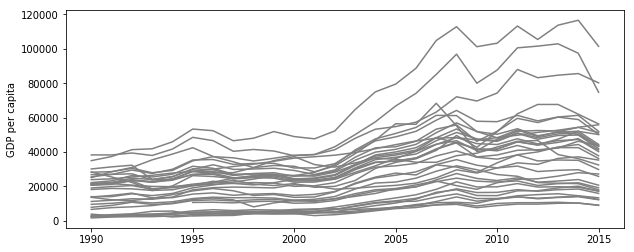

In [8]:
def plot_gdppc():
    fig, ax = plt.subplots(figsize=(10, 4))
    for (name, code), df in df_oecd.groupby(['Country Name', 'Country Code']):
        ax.plot(df.year, df.GDPPC, '-', color='gray', label=name)
    ax.set_ylabel('GDP per capita')
    return ax
plot_gdppc()

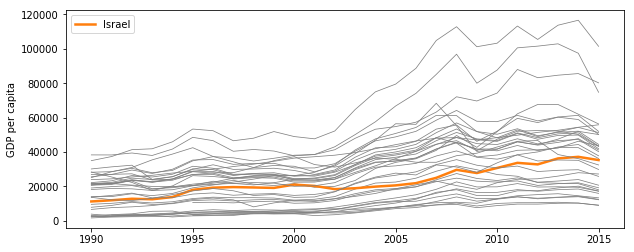

In [9]:
#! Look at what's important
def plot_gdppc(country_name):
    fig, ax = plt.subplots(figsize=(10, 4))
    for (name, code), df in df_oecd.groupby(['Country Name', 'Country Code']):
        if country_name == name:
            clr = 'C1'
            lw = 2.5
            zorder = 9 # show this line above the others
            lbl = name
        else:
            clr = 'gray'
            lw = 0.75
            zorder = 0
            lbl = ''
        ax.plot(df.year, df.GDPPC, '-', color=clr, lw=lw, label=lbl)
    ax.set_ylabel('GDP per capita')
    ax.legend()
    return ax
plot_gdppc('Israel')

In [10]:
# Normalize the values
def normalize_to_2000(df):
    ref = df.loc[df.year == 2000].iloc[0]['GDPPC']
    df.GDPPC /= ref  
    df.GDPPC = (df.GDPPC * 100) - 100
    return df
df_oecd_normalized = df_oecd.groupby('Country Name').apply(normalize_to_2000)
df_oecd_normalized = df_oecd_normalized.loc[df_oecd_normalized.year >= 2000]

In [11]:
df_oecd_normalized.loc[df_oecd_normalized['Country Code'] == 'ISR']

,Country Name,Country Code,year,GDPPC
1378,Israel,ISR,2000,0.000000
1412,Israel,ISR,2001,-3.543151
1446,Israel,ISR,2002,-12.449812
1480,Israel,ISR,2003,-9.999499
1514,Israel,ISR,2004,-5.528817
1548,Israel,ISR,2005,-2.094446
1582,Israel,ISR,2006,4.051440
1616,Israel,ISR,2007,18.793843
1650,Israel,ISR,2008,40.876378
1684,Israel,ISR,2009,32.033721


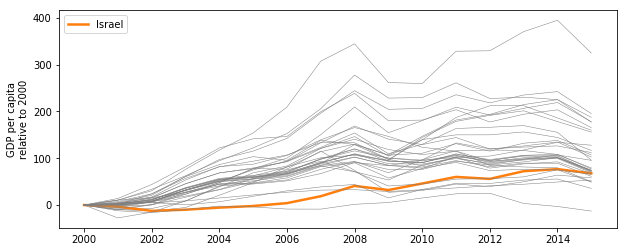

In [12]:
#! Plot the normalized data to reduce the clutter
def plot_normalized(country_name):
    fig, ax = plt.subplots(figsize=(10, 4))
    for (name, code), df in df_oecd_normalized.groupby(['Country Name', 'Country Code']):
        if country_name == name:
            clr = 'C1'
            lw = 2.5
            zorder = 9 # show this line above the others
            lbl = name
        else:
            clr = 'gray'
            lw = 0.5
            zorder = 0
            lbl = ''
        ax.plot(df.year, df.GDPPC, '-', color=clr, lw=lw, label=lbl)
    ax.set_ylabel('GDP per capita\nrelative to 2000')
    ax.legend()
    return ax
plot_normalized('Israel')

In [13]:
last_GDPPC = df_oecd_normalized.groupby('Country Name').apply(
    lambda df: df.loc[df.year == df.year.max()]['GDPPC'].iloc[0]
).sort_values()
last_GDPPC.head()

Country Name
Japan           -12.928887
Mexico           35.483387
Italy            48.853866
Greece           49.760223
United States    53.187969
dtype: float64

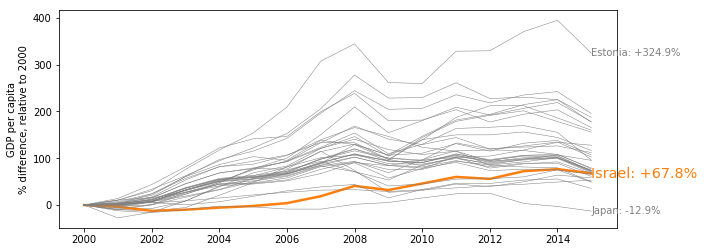

In [14]:
#! Let's make this prettier (*)
def plot_normalized(country_name):
    fig, ax = plt.subplots(figsize=(10, 4))
    for (name, code), df in df_oecd_normalized.groupby(['Country Name', 'Country Code']):
        if country_name == name:
            clr = 'C1'
            lw = 2.5
            zorder = 9 # show this line above the others
            lbl = name
        else:
            clr = 'gray'
            lw = 0.5
            zorder = 0
            lbl = ''
        ax.plot(df.year, df.GDPPC, '-', color=clr, lw=lw, label=lbl)
        place_legend = False
        if name == country_name:
            last_value = df.GDPPC.iloc[-1]
            fontsize='x-large'
            place_legend = True
        elif name in (last_GDPPC.index[0], last_GDPPC.index[-1]):
            last_value = df.GDPPC.iloc[-1]
            fontsize='medium'
            place_legend = True
        if place_legend:
            txt_x = df.year.max()
            ax.text(
                txt_x, last_value, f'{name}: {last_value:+.1f}%',
                fontsize=fontsize, color=clr, va='center'
            )    
    ax.set_ylabel('GDP per capita\n% difference, relative to 2000')
    return ax
plot_normalized('Israel')

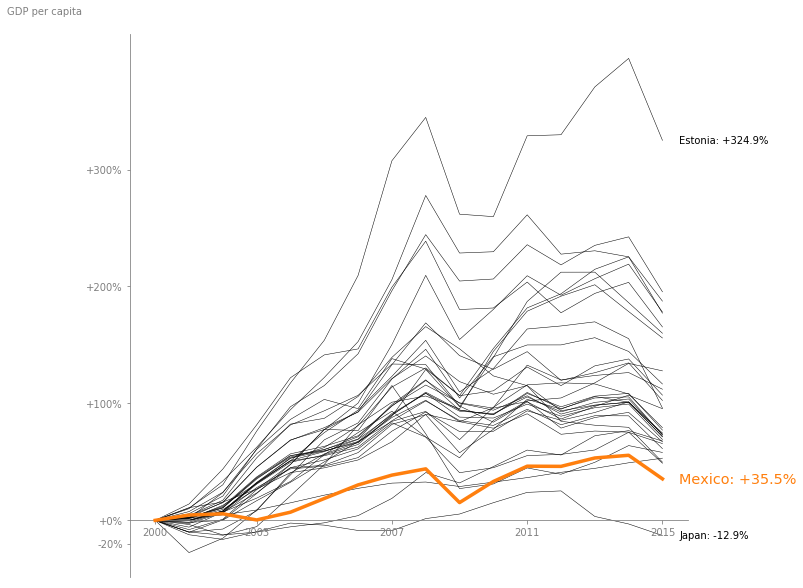

In [15]:
#! Let's make this EVEN MORE pretty (*)
def plot_normalized(country_name):

    fig, ax = plt.subplots(figsize=(10, 10))
    for (name, code), df in df_oecd_normalized.groupby(['Country Name', 'Country Code']):
        if country_name == name:
            clr = 'C1'
            lw = 3.5
            zorder = 9 # show this line above the others
            lbl = name
        else:
            clr = 'black'
            lw = 0.5
            zorder = 0
            lbl = ''
        ax.plot(df.year, df.GDPPC, '-', color=clr, zorder=zorder, lw=lw, label=lbl)
        place_legend = False
        if name == country_name:
            last_value = df.GDPPC.iloc[-1]
            fontsize='x-large'
            place_legend = True
        elif name in (last_GDPPC.index[0], last_GDPPC.index[-1]):
            last_value = df.GDPPC.iloc[-1]
            fontsize='medium'
            place_legend = True
        if place_legend:
            txt_x = df.year.max() + 0.5
            ax.text(
                txt_x, last_value, f'{name}: {last_value:+.1f}%',
                fontsize=fontsize, color=clr, va='center'
            )    
    ax.set_ylabel('GDP per capita', 
                  rotation=0, y=1.05, 
                  va='top', ha='right', ma='left', color='gray')
    ax.set_xticks(
        np.linspace(df_oecd_normalized.year.min(), df_oecd_normalized.year.max(), 5).astype(int)
    )

    tks = [-20, 0, 100, 200, 300]
    ax.set_yticks(tks)
    ax.set_yticklabels([f'{t:+.0f}%' for t in tks])

    ax.spines['bottom'].set_position('zero')
    for which in {'bottom', 'left'}:
        ax.spines[which].set_color('gray')
    ax.tick_params(colors='gray')
    sns.despine(ax=ax)
    return ax
plot_normalized('Mexico')

In [16]:
#! Add some interactivity
ipywidgets.interactive(
    plot_normalized,
    country_name=df_oecd_normalized['Country Name'].unique()
)

interactive(children=(Dropdown(description='country_name', options=('Australia', 'Austria', 'Belgium', 'Canada…

## Another approach

When we think of a time series plot, we usually think of an "evolution" line -- a line that plots the time on the X-axis, and the value on the Y-axis. This is not always the best approach. We can use stacked Kernel Density Estimation (KDE), to provide an information-rich and readable graphs. 

Sometimes, these graphs are called "[joyplots](https://seaborn.pydata.org/examples/kde_joyplot.html)"

In [17]:
def plot_filled_kde(data, clr='C0', baseline=0, x_from=None, x_to=None, log_transform=False, label=None, country=None, *args, **kwargs):
    data = data.dropna()
    ax = kwargs.pop('ax', None)
    if ax is None:
        ax = plt.gca()
    if x_from is None:
        x_from = data.min()
    if x_to is None:
        x_to = data.max()
    if log_transform:
        data = np.log10(data)
        x_from = np.log10(x_from)
        x_to = np.log10(x_to)
    kde = KDEUnivariate(
        data
    )
    kde.fit(bw=0.05)
    x = np.linspace(x_from, x_to, 100) # from 0 to 4. hours
    y = kde.evaluate(x)
    y += baseline
    ax.plot(x, y, '-', lw=0.8, color=clr, *args, **kwargs)
    ax.fill_between(x, y1=baseline, y2=y, color=clr, alpha=0.1)
    if label is not None:
        lbl_x = x[-1]
        lbl_y = y[-1]
        ax.text(x[-1], y[-1], label, color=clr, va='center')
    if country is not None:
        country_x = [data[country]]
        country_y = kde.evaluate(country_x) + baseline
        ax.plot(country_x, country_y, 'o', color=clr)
    return ax

Text(0.5,0,'GDP per capita (USD)')

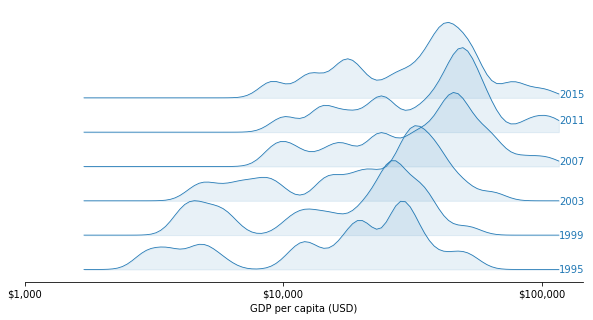

In [18]:
#! 
fig, ax = plt.subplots(figsize=(10, 5))
years = np.arange(1995, 2016, 4)
(x_from, x_to) = (df_oecd.GDPPC.min(), df_oecd.GDPPC.max())
for i, y in enumerate(years):
    df = df_oecd.loc[df_oecd.year == y].set_index('Country Name')
    plot_filled_kde(df.GDPPC, baseline=i, x_from=x_from, x_to=x_to, log_transform=True, label=y)
sns.despine(ax=ax, left=True)
ax.set_yticks([])
xticks = (np.linspace(np.log10(x_from), np.log10(x_to), 3)).astype(int)
ax.set_xticks(xticks); ax.set_xticklabels([f'${10**t:,d}' for t in xticks])
ax.set_xlabel('GDP per capita (USD)')

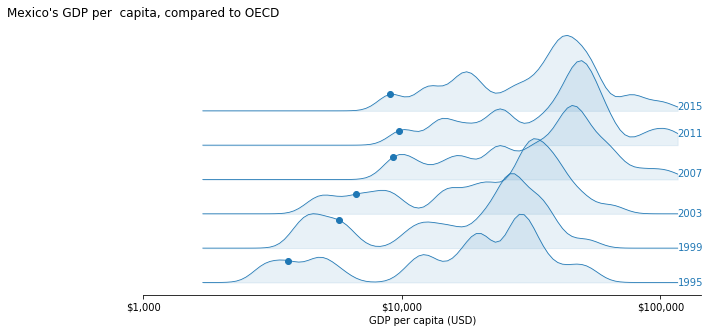

In [19]:
#!
def follow_a_country(country):
    fig, ax = plt.subplots(figsize=(10, 5))
    years = np.arange(1995, 2016, 4)
    (x_from, x_to) = (df_oecd.GDPPC.min(), df_oecd.GDPPC.max())
    for i, y in enumerate(years):
        df = df_oecd.loc[df_oecd.year == y].set_index('Country Name')
        plot_filled_kde(df.GDPPC, baseline=i, x_from=x_from, x_to=x_to, log_transform=True, label=y, 
                        country=country, ax=ax)
    sns.despine(ax=ax, left=True)
    ax.set_yticks([])
    xticks = (np.linspace(np.log10(x_from), np.log10(x_to), 3)).astype(int)
    ax.set_xticks(xticks); ax.set_xticklabels([f'${10**t:,d}' for t in xticks])
    ax.set_xlabel('GDP per capita (USD)')
    ax.set_title(
        f"{country}'s GDP per  capita, compared to OECD",
        ma='left', x=0
                )
follow_a_country('Mexico')

In [20]:
ipywidgets.interact(follow_a_country, country=df_oecd['Country Name'].unique())

interactive(children=(Dropdown(description='country', options=('Australia', 'Austria', 'Belgium', 'Canada', 'S…

<function __main__.follow_a_country(country)>